In [18]:
import pandas as pd
# Mengimpor dataset
data = pd.read_csv('HeartDiseaseCleveland.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


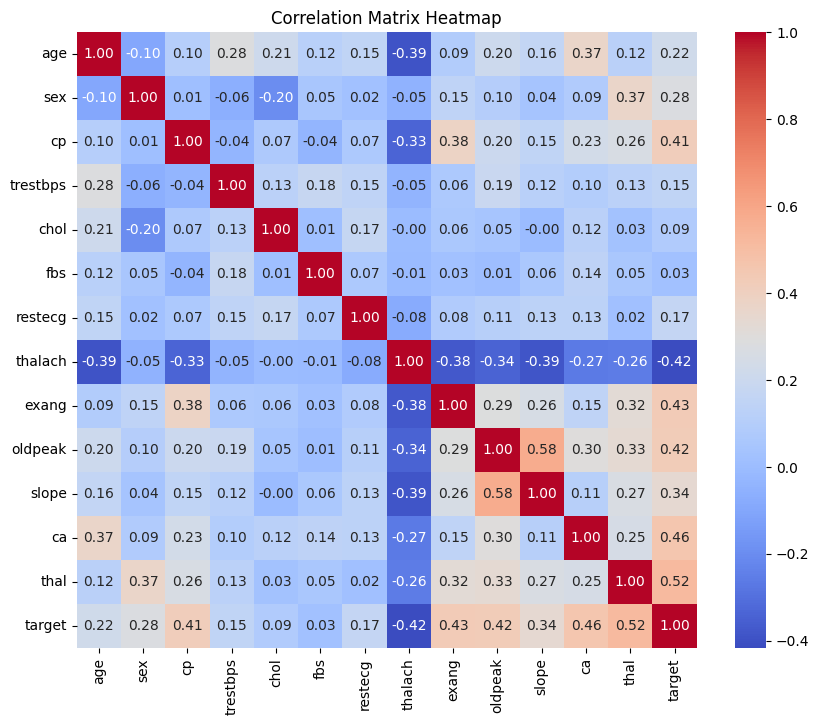

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
# Exclude non-numeric columns from the correlation matrix
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
# Memisahkan fitur dan label
X = dataset.iloc[:, 0].values # Memastikan X adalah array 2D
y = dataset.iloc[:, 1].values


In [22]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inisialisasi ANN
MesinKlasifikasi = Sequential()

# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=13))

# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Menambah output layer
MesinKlasifikasi.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size=10, epochs=200)

# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = (y_pred > 0.5)


Epoch 1/200


c:\Users\HP\Documents\perkuliahan\semester 6\ML\tugas 3\myenv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5547 - loss: 0.6931
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5734 - loss: 0.6921 
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7192 - loss: 0.6889 
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8469 - loss: 0.6779 
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8678 - loss: 0.6526
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.6120 
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8860 - loss: 0.5634 
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8602 - loss: 0.5092 
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8518 - loss: 0.4686 
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8811 - loss: 0.3948 
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8744 - loss: 0.3642 
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.

In [32]:
# Menghitung akurasi
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8032786885245902


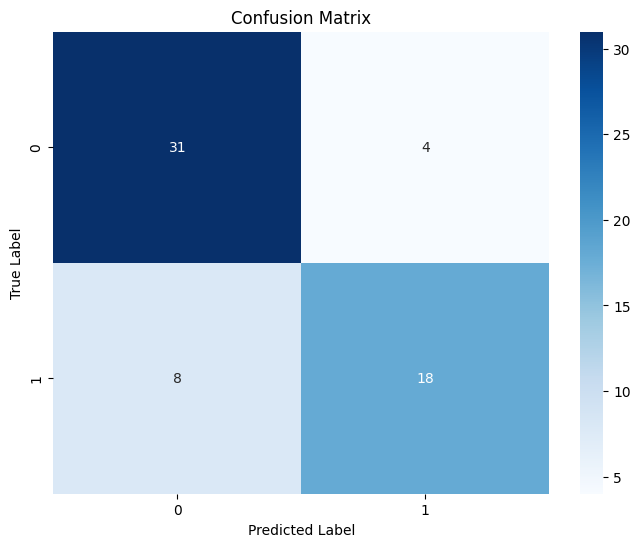

In [33]:
# Membuat visualisasi confusion matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()